In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

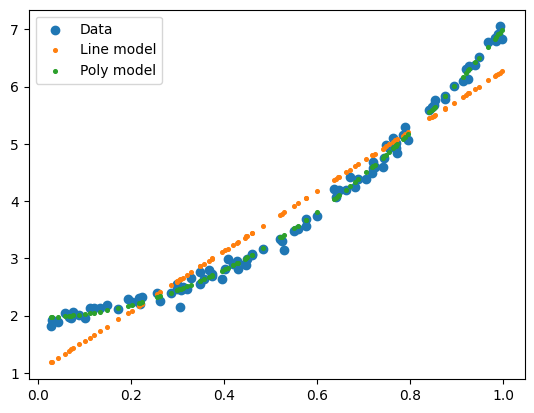

(0.13885601329712036, 0.008668465567841583)

In [62]:
n = 100
x = np.random.rand(n, 1)
y = 2.0 + 5 * x**2 + 0.1 * np.random.randn(n, 1)

line_model = LinearRegression().fit(x, y)
line_predict = line_model.predict(x)
line_mse = mean_squared_error(y, line_predict)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(x)
poly_model = LinearRegression().fit(X_poly, y)
poly_predict = poly_model.predict(X_poly)
poly_mse = mean_squared_error(y, poly_predict)

plt.scatter(x, y, label = "Data")
plt.scatter(x, line_predict, label = "Line model", s=7)
plt.scatter(x, poly_predict, label = "Poly model", s=7)
plt.legend()
plt.show()
line_mse, poly_mse

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)

mse_train = mean_squared_error(y_train, model.predict(X_train))
mse_test  = mean_squared_error(y_test,  model.predict(X_test))

X_test.shape, mse_train, mse_test

((20, 2), 0.008688855569233326, 0.00936044856154632)

The code is completed such that polynomial features and the targets y get split into training and test data.